In [51]:
#Imported the necessary modules 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.utils import plot_model

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score

from keras.models import load_model


In [2]:
# Load dataset for pre-processing 

BASE_DIR = 'C:/Users/austi/OneDrive/Desktop/FACI using CNN/UTKFace'


In [3]:
# Generating labels for age and gender 

image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

100%|██████████| 23708/23708 [00:00<00:00, 295505.71it/s]


In [4]:
# converting to dataframe

df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,C:/Users/austi/OneDrive/Desktop/FACI using CNN...,100,0
1,C:/Users/austi/OneDrive/Desktop/FACI using CNN...,100,0
2,C:/Users/austi/OneDrive/Desktop/FACI using CNN...,100,1
3,C:/Users/austi/OneDrive/Desktop/FACI using CNN...,100,1
4,C:/Users/austi/OneDrive/Desktop/FACI using CNN...,100,1


In [5]:
# Mapping gender labels
gender_dict = {0:'Male', 1:'Female'}

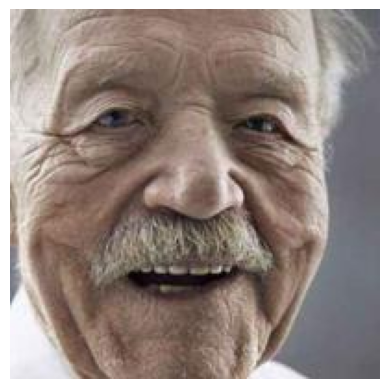

In [52]:
# Start of Exploratory Data  Analysis

img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

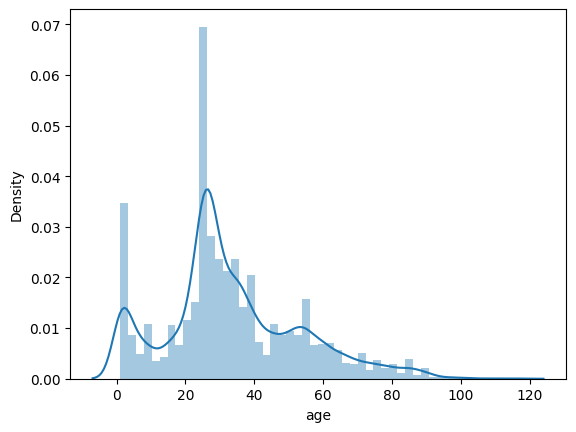

In [7]:
sns.distplot(df['age'])

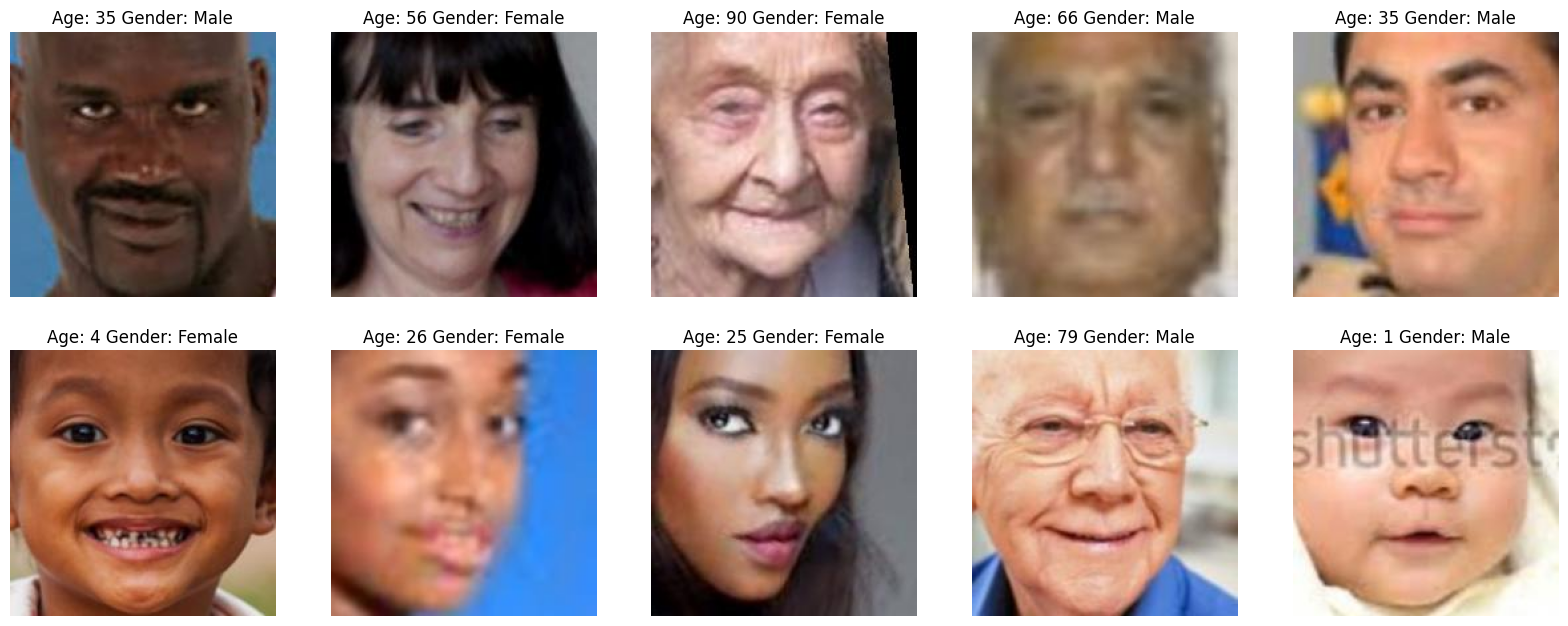

In [57]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)

plt.figure(figsize=(20, 20))

for index, (file, age, gender) in shuffled_df.iloc[0:10].iterrows():
    plt.subplot(5, 5, index+1)
    img = Image.open(file)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

plt.show()

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [11]:
X = extract_features(df['image'])
print(X.shape)

100%|██████████| 23708/23708 [00:50<00:00, 466.88it/s]


(23708, 128, 128, 1)


In [12]:
# normalize the images
X = X/255.0

In [13]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [14]:
input_shape = (128, 128, 1)

In [15]:
#Model creation 

inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [17]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30


593/593 [==============================] - 141s 232ms/step - loss: 11.3305 - gender_out_loss: 0.6945 - age_out_loss: 10.6360 - gender_out_accuracy: 0.5254 - gender_out_mae: 0.4964 - age_out_accuracy: 0.0591 - age_out_mae: 10.6360 - val_loss: 33.9233 - val_gender_out_loss: 0.6639 - val_age_out_loss: 33.2594 - val_gender_out_accuracy: 0.6210 - val_gender_out_mae: 0.4201 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 33.2594
Epoch 2/30
593/593 [==============================] - 128s 216ms/step - loss: 8.2491 - gender_out_loss: 0.4844 - age_out_loss: 7.7647 - gender_out_accuracy: 0.7656 - gender_out_mae: 0.3273 - age_out_accuracy: 0.0466 - age_out_mae: 7.7647 - val_loss: 28.5609 - val_gender_out_loss: 0.5668 - val_age_out_loss: 27.9941 - val_gender_out_accuracy: 0.7406 - val_gender_out_mae: 0.3084 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 27.9941
Epoch 3/30
593/593 [==============================] - 129s 218ms/step - loss: 7.2732 - gender_out_loss: 0.3704 - 

In [37]:
# Split the data into training and validation sets
X_train, X_val, y_gender_train, y_gender_val, y_age_train, y_age_val = train_test_split(X, y_gender, y_age, test_size=0.2, random_state=42)

# Evaluate the model on the validation set
val_results = model.evaluate(X_val, [y_gender_val, y_age_val])
print("Validation Results:", val_results)

# Extracting relevant values from the validation results
val_loss = val_results[0]
val_gender_loss = val_results[1]
val_age_loss = val_results[2]
val_gender_accuracy = val_results[3]
val_gender_mae = val_results[4]
val_age_accuracy = val_results[5]
val_age_mae = val_results[6]

print("Validation Loss:", val_loss)
print("Validation Gender Loss:", val_gender_loss)
print("Validation Age Loss:", val_age_loss)
print("Validation Gender Accuracy:", val_gender_accuracy)
print("Validation Gender MAE:", val_gender_mae)
print("Validation Age Accuracy:", val_age_accuracy)
print("Validation Age MAE:", val_age_mae)

# Predict on the validation set
y_gender_pred, y_age_pred = model.predict(X_val)

# Calculate RMSE for age prediction

rmse_age = np.sqrt(mean_squared_error(y_age_val, y_age_pred))
print("RMSE for Age Prediction:", rmse_age)

# Convert predicted probabilities to binary predictions
y_gender_pred_binary = np.round(y_gender_pred)

f1 = f1_score(y_gender_val, y_gender_pred_binary)
recall = recall_score(y_gender_val, y_gender_pred_binary)
precision = precision_score(y_gender_val, y_gender_pred_binary)

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


149/149 [==============================] - 7s 49ms/step - loss: 5.8361 - gender_out_loss: 0.2190 - age_out_loss: 5.6171 - gender_out_accuracy: 0.9502 - gender_out_mae: 0.0672 - age_out_accuracy: 0.0453 - age_out_mae: 5.6171
Validation Results: [5.836071014404297, 0.21901558339595795, 5.617053508758545, 0.9502319693565369, 0.06722135841846466, 0.045339521020650864, 5.617053508758545]
Validation Loss: 5.836071014404297
Validation Gender Loss: 0.21901558339595795
Validation Age Loss: 5.617053508758545
Validation Gender Accuracy: 0.9502319693565369
Validation Gender MAE: 0.06722135841846466
Validation Age Accuracy: 0.045339521020650864
Validation Age MAE: 5.617053508758545
149/149 [==============================] - 7s 47ms/step
RMSE for Age Prediction: 10.407350560888743
F1 Score: 0.9473214285714285
Recall: 0.9401860877270714
Precision: 0.954565901934323


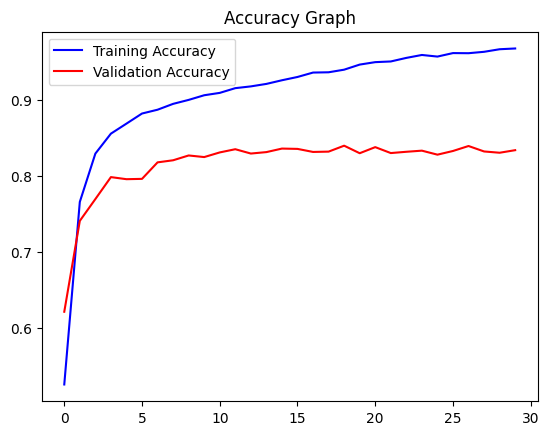

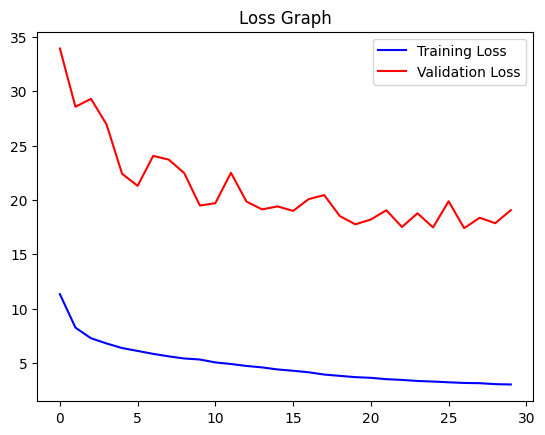

In [18]:
# now plot the result for gender 

acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

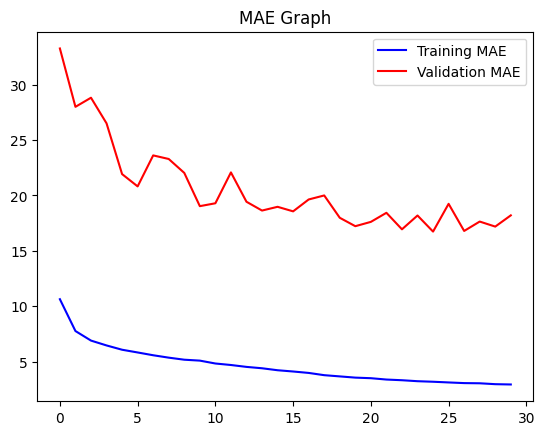

In [20]:
# now plot he result for gender

loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('MAE Graph')
plt.legend()
plt.show()

In [39]:
model.save('age-gender_prediction_model.h5')

In [41]:
# Load the saved model
model = load_model('age-gender_prediction_model.h5')

Original Gender: Male 
Original Age: 11
1/1 [==============================] - 0s 130ms/step
Predicted Gender: Male 
Predicted Age: 14


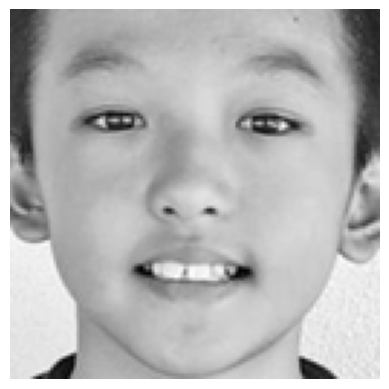

In [58]:
# Predicting the Test Data 

image_index = 210
print("Original Gender:", gender_dict[y_gender[image_index]],"\n" "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "\n" "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female 
Original Age: 21
1/1 [==============================] - 0s 39ms/step
Predicted Gender: Female 
Predicted Age: 22


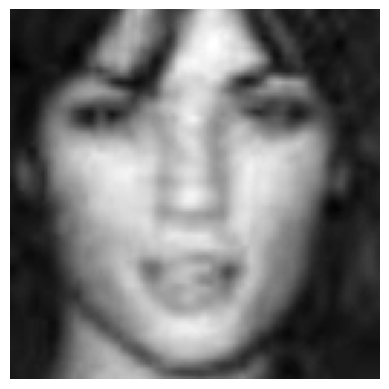

In [46]:
image_index = 3110
print("Original Gender:", gender_dict[y_gender[image_index]], "\n" "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender,"\n" "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female 
Original Age: 2
1/1 [==============================] - 0s 71ms/step
Predicted Gender: Female 
Predicted Age: 1


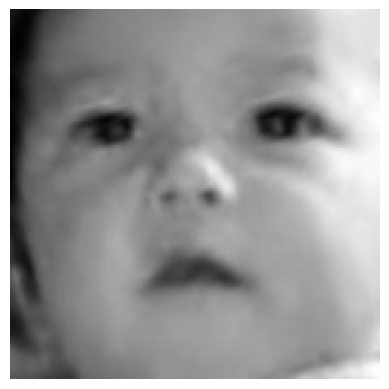

In [54]:
image_index = 10330
print("Original Gender:", gender_dict[y_gender[image_index]], "\n" "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender,"\n" "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');